In [1]:
# Data preprocessing

import pandas as pd
from itertools import *
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
raw_data = pd.read_csv(r'Datasets/adult.data', names=columns, 
                       sep=' *, *', na_values='?', engine='python')
data_sex_male = raw_data[raw_data['sex'] == 'Male']
income_data_sex_male = list(data_sex_male['income'])
prop_male_pos = income_data_sex_male.count('>50K') / len(income_data_sex_male)
prop_male_neg = 1 - prop_male_pos

data_sex_female = raw_data[raw_data['sex'] == 'Female']
income_data_sex_female = list(data_sex_female['income'])

Null hypothesis (proposed distribution): [0.6942634235888022, 0.3057365764111978]

Proposed distribution rejected at alpha = 0.05. Kardis = 4.85339787463368e-509.
Any plausible distribution must boost probability over the given distribution by 1.03020608018406e+507, and will therefore have a minimum probability of 7.42794184854851e-7.
Closest plausible distribution: [0.8768108257225472, 0.12318917427745281]


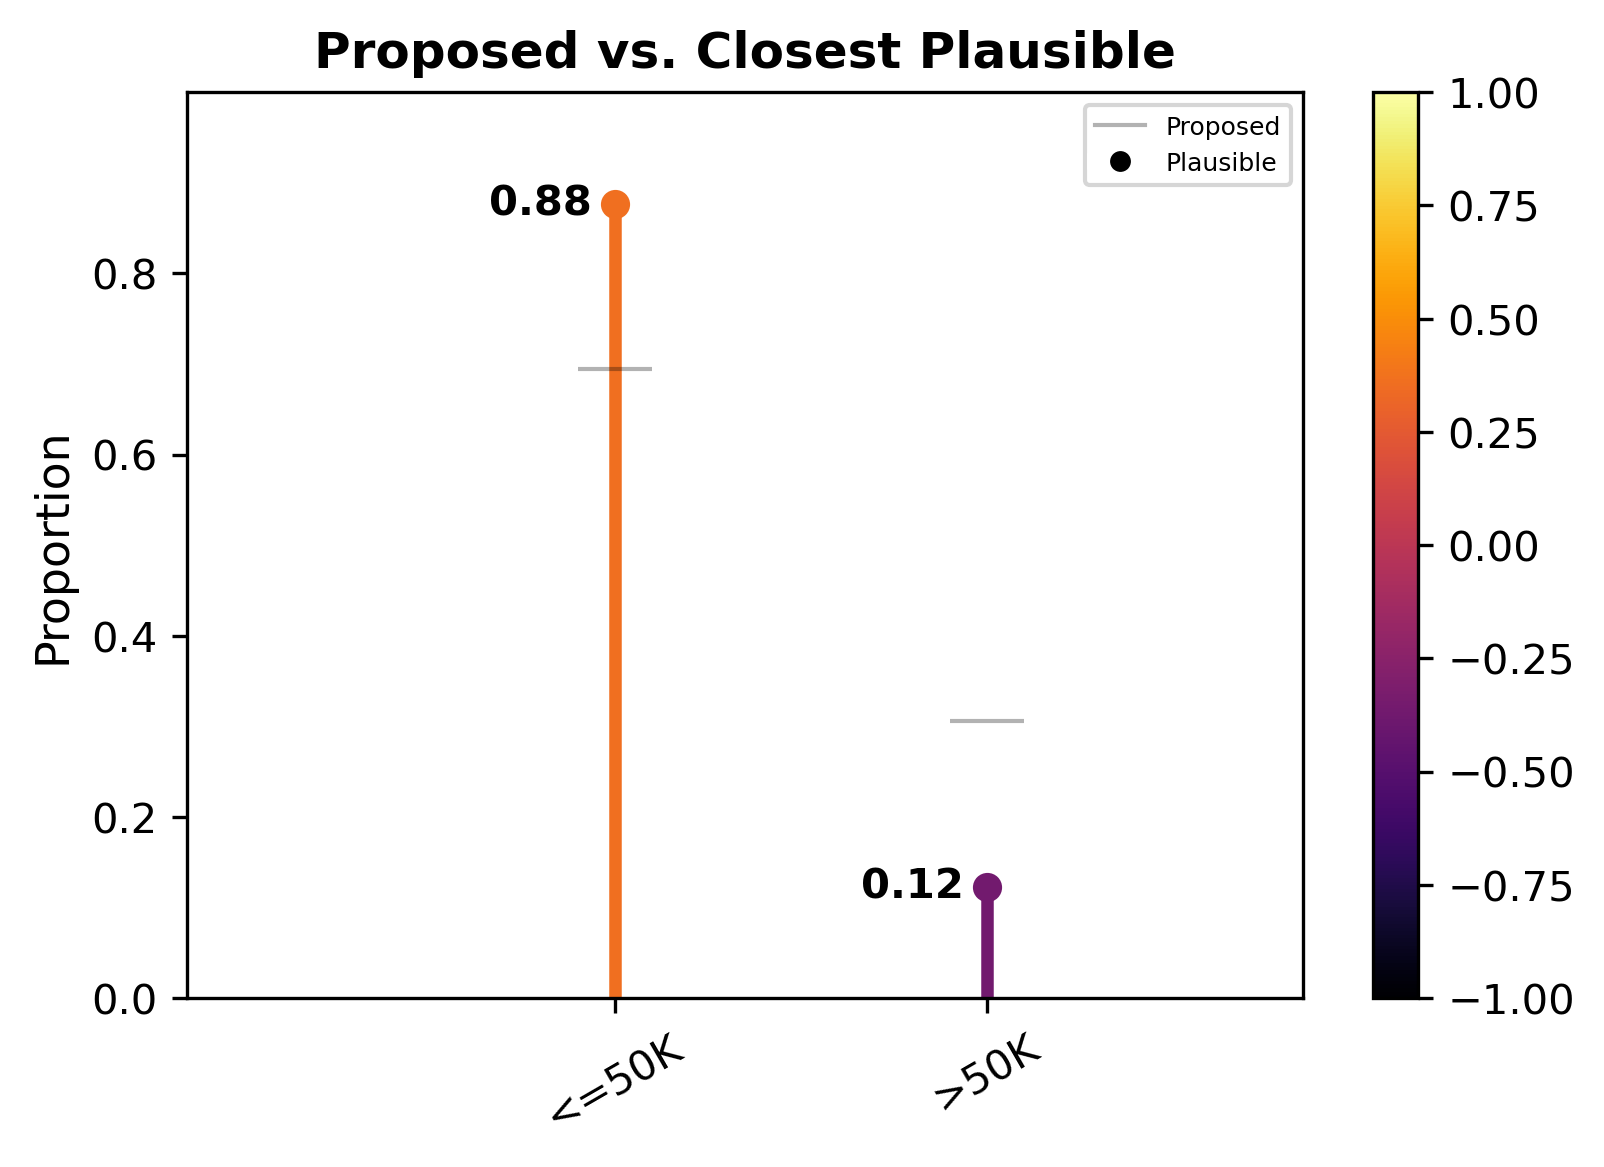

In [2]:
# Setup and Experiment

val_list = ['<=50K', '>50K']
null_hyp_sex = [prop_male_neg, prop_male_pos]
print("Null hypothesis (proposed distribution): " + str(null_hyp_sex) + "\n")

q = hypothesis_test(income_data_sex_female, val_list, hypothesis=null_hyp_sex)[4]
graph_distributions(q, val_list, hypothesis=null_hyp_sex, filename=r"Results/uci_sex_female_dists.pdf")